<a href="https://colab.research.google.com/github/RavindrapalRathore/Final_project/blob/main/Status_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

In [ ]:
loan_train = pd.read_csv('/content/drive/MyDrive/dataset/final project/train.csv')

In [ ]:

print("The Loan Prediction Dataset has")
print("\t\tNumber of Factors : \t", loan_train.shape[1] - 1)
print("\t\tNumber of Samples : \t", loan_train.shape[0])

The Loan Prediction Dataset has
		Number of Factors : 	 12
		Number of Samples : 	 614


In [ ]:
loan_train.head(40)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Exploratory Data Analysis

In [ ]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
print('Loan Data Factors : \n')
j = 1
for i in loan_train.columns:
    print(j, '.', i)
    j += 1

Loan Data Factors : 

1 . Loan_ID
2 . Gender
3 . Married
4 . Dependents
5 . Education
6 . Self_Employed
7 . ApplicantIncome
8 . CoapplicantIncome
9 . LoanAmount
10 . Loan_Amount_Term
11 . Credit_History
12 . Property_Area
13 . Loan_Status


checking the dataset is Balanced or Imbalanced

In [ ]:
loan_train['Loan_Status'].isnull().sum()

0

In [ ]:
print("Unique values : ", loan_train['Loan_Status'].unique())
print("Unique values counts : \n", loan_train['Loan_Status'].value_counts())

Unique values :  ['Y' 'N']
Unique values counts : 
 Y    422
N    192
Name: Loan_Status, dtype: int64


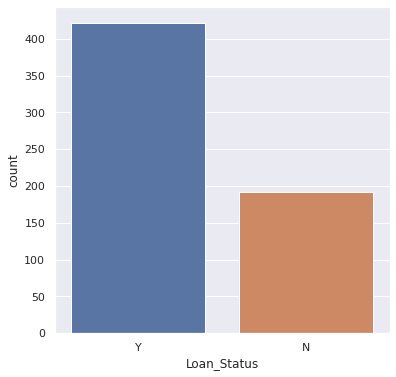

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Status', data = loan_train)
# plt.savefig('/loan_status_counts.png')

Remove the samples havin null values in any of the columns and Loan_Status must be Yes

In [ ]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_train.shape

(614, 13)

## Feature Engineering



Loan_ID

In [ ]:
loan_train['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Gender

In [ ]:
loan_train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Gender'].isnull().sum())
print("Unique values : ", loan_train['Gender'].unique())
print("Value counts : \n", loan_train['Gender'].value_counts())

Number of null values :  13
Unique values :  ['Male' 'Female' nan]
Value counts : 
 Male      489
Female    112
Name: Gender, dtype: int64


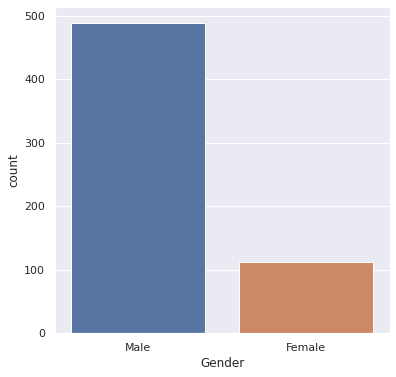

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Gender', data = loan_train)
# plt.savefig('../images/gender_counts_0.png')

In [ ]:
samples_with_null_values_on_gender_column = loan_train[loan_train['Gender'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
# Initialize Gender predictor columns list
GENDER_PREDICTOR_COLUMNS = ['Dependents', 'ApplicantIncome', 'LoanAmount', 'Property_Area', 'Gender']

# Let's get the rows not having null values on gender column
samples_without_null_values_on_gender_column = loan_train[~loan_train['Gender'].isnull()][GENDER_PREDICTOR_COLUMNS]
print("Number of Samples Before dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Dropping samples having null values in predictor columns
samples_without_null_values_on_gender_column = samples_without_null_values_on_gender_column.dropna(how = 'any')
print("Number of Samples After dropping samples having null values in predictor columns for Gender column: ", 
     samples_without_null_values_on_gender_column.shape[0])

# Conveting categorical values on Dependents column to numerical values
samples_without_null_values_on_gender_column['Dependents'] = samples_without_null_values_on_gender_column['Dependents'].apply(
    lambda x : {'0': 0, '1':1, '2':2, '3+':3}[x]
)
# Conveting categorical values on Property_Area column to numerical values
samples_without_null_values_on_gender_column['Property_Area'] = samples_without_null_values_on_gender_column['Property_Area'].apply(
    lambda x : {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[x]
)

# Building Gender Predictor using Pipeline and KNeigborsClassifiers
Gender_predictor = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('gen_predictor', KNeighborsClassifier(n_neighbors = 1))
])
Gender_predictor.fit(samples_without_null_values_on_gender_column.iloc[:, :-1].values,
                    samples_without_null_values_on_gender_column.iloc[:, -1].values)

Number of Samples Before dropping samples having null values in predictor columns for Gender column:  601
Number of Samples After dropping samples having null values in predictor columns for Gender column:  566


Pipeline(steps=[('scaler', StandardScaler()),
                ('gen_predictor', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
def gender_null_value_filler(df, Gender_predictor):
    for row in range(df.shape[0]):
        if df.loc[row, 'Gender'] is np.nan:
            X = loan_train.loc[row, GENDER_PREDICTOR_COLUMNS[:-1]].values.reshape(1, -1)
            X[0][0] = {'0': 0, '1':1, '2':2, '3+':3}[X[0][0]]
            X[0][3] = {'Urban': 2, 'Semiurban':1.5, 'Rural':1}[X[0][3]]
            df.loc[row, 'Gender'] = Gender_predictor.predict(X)
    return df

In [ ]:
loan_train = gender_null_value_filler(loan_train, Gender_predictor)

In [ ]:
loan_train['Gender'] = loan_train.Gender.apply(lambda x : {'Male': 1, 'Female' : 0}[x])

In [ ]:
loan_train['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
601    0
602    1
603    1
604    1
605    0
Name: Gender, Length: 606, dtype: int64

Married

In [ ]:
loan_train['Married'].describe()

count     603
unique      2
top       Yes
freq      392
Name: Married, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Married'].isnull().sum())
print("Unique values : ", loan_train['Married'].unique())
print("Value counts : \n", loan_train['Married'].value_counts())

Number of null values :  3
Unique values :  ['No' 'Yes' nan]
Value counts : 
 Yes    392
No     211
Name: Married, dtype: int64


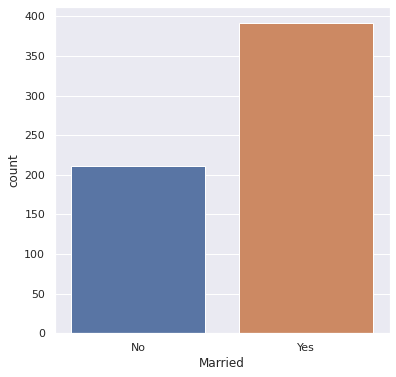

In [ ]:
plt.figure(figsize = (6, 6))
sb.countplot(x = 'Married', data = loan_train)
# plt.savefig('../images/married_counts_0.png')

In [ ]:
samples_with_null_values_on_gender_column = loan_train[loan_train['Married'].isnull()]
samples_with_null_values_on_gender_column

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,1,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
225,LP001760,1,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
431,LP002393,0,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
loan_train[loan_train['Married'] == 'Yes'].describe(include = 'all').iloc[:, :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,392,392.000000,392,384,392,374,392.000000,392.000000,378.000000,383.000000,357.000000,392,392
unique,392,NaN,1,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,NaN,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,NaN,392,171,303,323,NaN,NaN,NaN,NaN,NaN,149,279
mean,NaN,0.920918,NaN,NaN,NaN,NaN,5447.864796,1793.499796,153.751323,337.253264,0.840336,NaN,NaN
std,NaN,0.270211,NaN,NaN,NaN,NaN,6544.092138,2038.588054,85.426045,66.711037,0.366808,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,150.000000,0.000000,17.000000,12.000000,0.000000,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,2854.500000,0.000000,108.000000,360.000000,1.000000,NaN,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,3832.000000,1625.000000,131.000000,360.000000,1.000000,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,5789.500000,2460.000000,175.750000,360.000000,1.000000,NaN,NaN


- There are 398 married applicants, among them 309 are Graduated, 326 are Not Self_Employed, 151 semi-urban.
- From this, we can assume that all missing samples as Married.

In [ ]:
loan_train['Married'] = loan_train['Married'].fillna('Yes')

In [ ]:
loan_train['Married'].value_counts()

Yes    395
No     211
Name: Married, dtype: int64

In [ ]:
loan_train['Married'] = loan_train['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

Dependents

In [ ]:
loan_train['Dependents'].describe()

count     591
unique      4
top         0
freq      341
Name: Dependents, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Dependents'].isnull().sum())
print("Unique values : ", loan_train['Dependents'].unique())
print("Value counts : \n", loan_train['Dependents'].value_counts())

Number of null values :  15
Unique values :  ['0' '1' '2' '3+' nan]
Value counts : 
 0     341
1     101
2     101
3+     48
Name: Dependents, dtype: int64


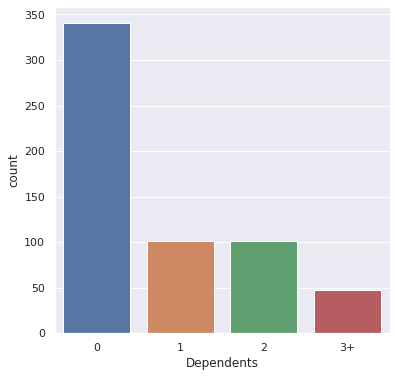

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Dependents', data = loan_train)
# plt.savefig('../images/dependents_counts_0.png')
plt.show()

In [ ]:
loan_train[loan_train['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,1,1,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,1,1,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,1,1,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
223,LP001754,1,1,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
225,LP001760,1,1,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
290,LP001945,0,0,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
298,LP001972,1,1,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
329,LP002100,1,0,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
331,LP002106,1,1,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
342,LP002130,1,1,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
def dependents_null_value_filler(df):
    for row in range(df.shape[0]):
        if df.loc[row, 'Dependents'] is np.nan:
            df.loc[row, 'Dependents'] = str(df.loc[row, 'Married'])
    return df

In [ ]:
loan_train = dependents_null_value_filler(loan_train)

In [ ]:
loan_train['Dependents'] = loan_train['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

Education

In [ ]:
loan_train['Education'].describe()

count          606
unique           2
top       Graduate
freq           472
Name: Education, dtype: object

In [ ]:
loan_train['Education'].isnull().sum()

0

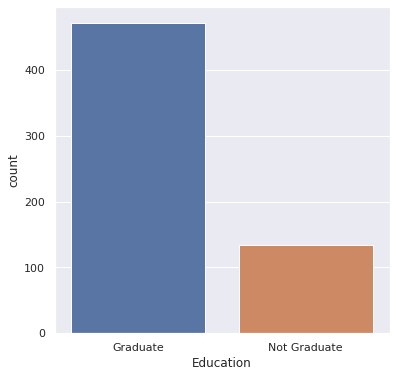

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Education', data = loan_train)
# plt.savefig('../images/education_counts_0.png')
plt.show()

In [ ]:
loan_train['Education'] = loan_train['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])

Self_Employed

In [ ]:
loan_train['Self_Employed'].describe()

count     574
unique      2
top        No
freq      496
Name: Self_Employed, dtype: object

In [ ]:
print("Number of null values : ", loan_train['Self_Employed'].isnull().sum())
print("Unique values : ", loan_train['Self_Employed'].unique())
print("Value counts : \n", loan_train['Self_Employed'].value_counts())

Number of null values :  32
Unique values :  ['No' 'Yes' nan]
Value counts : 
 No     496
Yes     78
Name: Self_Employed, dtype: int64


In [ ]:
loan_train['Self_Employed'].fillna(value = 'No', inplace = True)

loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])

Applicant Income

In [ ]:
loan_train['ApplicantIncome'].describe()

count      606.000000
mean      5278.496700
std       5775.938014
min        150.000000
25%       2877.500000
50%       3787.500000
75%       5741.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
loan_train['ApplicantIncome'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


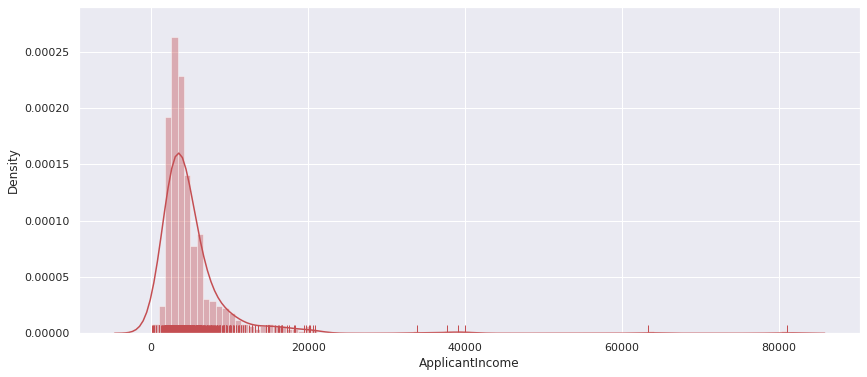

In [ ]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['ApplicantIncome'], rug = True, bins = 100, color='r')
# plt.savefig('../images/ApplicantIncomeDistribution.png')

In [ ]:
loan_train[loan_train['ApplicantIncome'] > 20000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
129,LP001469,1,0,0,1,1,20166,0.0,650.0,480.0,NaN,Urban,Y
154,LP001536,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Semiurban,Y
181,LP001637,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,Semiurban,N
183,LP001640,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
281,LP001922,1,1,0,1,0,20667,0.0,NaN,360.0,1.0,Rural,N
305,LP001996,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,Rural,N
330,LP002101,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Urban,Y
405,LP002317,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,Rural,N
439,LP002422,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Semiurban,Y
500,LP002624,1,1,0,1,0,20833,6667.0,480.0,360.0,NaN,Urban,Y


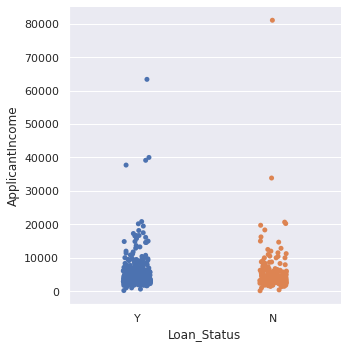

In [ ]:
sb.catplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_train)

Co-applicant Income

In [ ]:
loan_train['CoapplicantIncome'].describe()

count      606.000000
mean      1624.146733
std       2936.326938
min          0.000000
25%          0.000000
50%       1211.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
loan_train['CoapplicantIncome'].isnull().sum()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


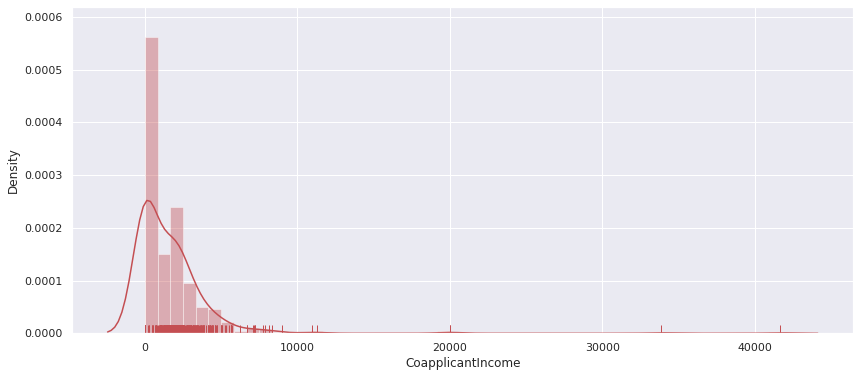

In [ ]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['CoapplicantIncome'], rug = True, color = 'r')
# plt.savefig('../images/CoapplicantIncomeDistribution.png')

In [ ]:
loan_train['CoapplicantIncome'].value_counts()

0.0       268
1666.0      5
2500.0      5
2083.0      5
5625.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 285, dtype: int64

LoanAmount

In [ ]:
loan_train['LoanAmount'].describe()

count    584.000000
mean     144.863014
std       82.251226
min        9.000000
25%      100.000000
50%      127.000000
75%      165.250000
max      650.000000
Name: LoanAmount, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


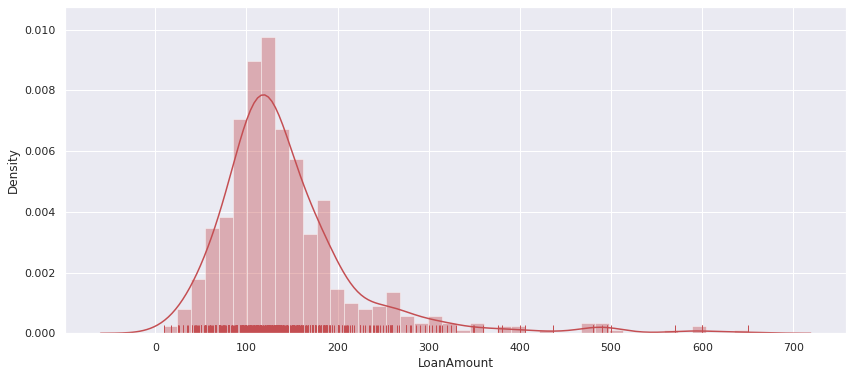

In [ ]:
plt.figure(figsize = (14, 6))
sb.distplot(loan_train['LoanAmount'], rug = True, color = 'r')
# plt.savefig('../images/LoanAmountDistribution.png')

In [ ]:
loan_train['LoanAmount'].value_counts()

120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
279.0     1
191.0     1
35.0      1
280.0     1
253.0     1
Name: LoanAmount, Length: 200, dtype: int64

In [ ]:
loan_train['LoanAmount'].isnull().sum()

22

In [ ]:
loan_train[loan_train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,1,1,0,1,0,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,1,1,1,1,0,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,1,1,1,1,1,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,1,1,1,1,0,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,1,1,0,1,0,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,0,0,1,1,1,7451,0.0,NaN,360.0,1.0,Semiurban,Y
126,LP001449,1,0,0,1,0,3865,1640.0,NaN,360.0,1.0,Rural,Y
199,LP001682,1,1,3,0,0,3992,0.0,NaN,180.0,1.0,Urban,N


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
loan_train[~loan_train['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,403.000000
mean,151.220994,142.007444
std,85.862783,80.522408
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,125.000000
75%,176.000000,160.000000
max,570.000000,650.000000


In [ ]:
def LoanAmount_null_values_filler(df):
    for row in range(df.shape[0]):
        if pd.isnull(df.loc[row, 'LoanAmount']):
            if df.loc[row, 'Loan_Status'] == 'Y':
                df.loc[row, 'LoanAmount'] = 151.22
            elif df.loc[row, 'Loan_Status'] == 'N':
                df.loc[row, 'LoanAmount'] = 144.29
            else:
                pass
    return df

In [ ]:
loan_train = LoanAmount_null_values_filler(loan_train)

Loan_Amount_Term

In [ ]:
loan_train['Loan_Amount_Term'].describe()

count    592.000000
mean     342.162162
std       65.171808
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [ ]:
loan_train['Loan_Amount_Term'].isnull().sum()

14

In [ ]:
loan_train['Loan_Amount_Term'].value_counts()

360.0    506
180.0     43
480.0     15
300.0     12
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

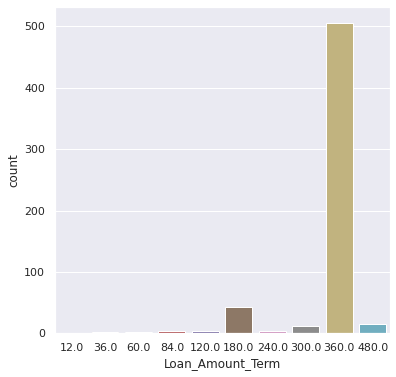

In [ ]:
plt.figure(figsize=(6, 6))
sb.countplot(x = 'Loan_Amount_Term', data = loan_train)
# plt.savefig('../images/term_counts.png')
plt.show()

In [ ]:
loan_train[pd.isnull(loan_train['Loan_Amount_Term'])]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,1,1,0,1,0,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,1,1,0,1,0,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,1,1,0,0,1,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,0,0,0,1,0,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,1,1,3,0,0,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,1,1,0,0,0,3572,4114.0,152.0,NaN,0.0,Rural,N
164,LP001574,1,1,0,1,0,3707,3166.0,182.0,NaN,1.0,Rural,Y
194,LP001669,0,0,0,0,0,1907,2365.0,120.0,NaN,1.0,Urban,Y
220,LP001749,1,1,0,1,0,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
229,LP001770,1,0,0,0,0,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [ ]:
loan_train[~loan_train['Loan_Amount_Term'].isnull()].groupby('Loan_Status').describe().T.loc['Loan_Amount_Term']

Loan_Status,N,Y
count,186.000000,406.00000
mean,344.064516,341.29064
std,69.238921,63.29074
min,36.000000,12.00000
25%,360.000000,360.00000
50%,360.000000,360.00000
75%,360.000000,360.00000
max,480.000000,480.00000


In [ ]:
loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term'].fillna(value = 360)

Credit_History

In [ ]:
loan_train['Credit_History'].describe()

count    557.000000
mean       0.840215
std        0.366735
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [ ]:
loan_train['Credit_History'].isnull().sum()

49

In [ ]:
loan_train['Credit_History'].value_counts()

1.0    468
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
loan_train[loan_train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,1,0,1,0,0,3596,0.0,100.00,240.0,NaN,Urban,Y
24,LP001052,1,1,1,1,0,3717,2925.0,151.00,360.0,NaN,Semiurban,N
30,LP001091,1,1,1,1,0,4166,3369.0,201.00,360.0,NaN,Urban,N
42,LP001123,1,1,0,1,0,2400,0.0,75.00,360.0,NaN,Urban,Y
79,LP001264,1,1,3,0,1,3333,2166.0,130.00,360.0,NaN,Semiurban,Y
83,LP001273,1,1,0,1,0,6000,2250.0,265.00,360.0,NaN,Semiurban,N
86,LP001280,1,1,2,0,0,3333,2000.0,99.00,360.0,NaN,Semiurban,Y
95,LP001326,1,0,0,1,0,6782,0.0,144.29,360.0,NaN,Urban,N
117,LP001405,1,1,1,1,0,2214,1398.0,85.00,360.0,NaN,Urban,Y
125,LP001443,0,0,0,1,0,3692,0.0,93.00,360.0,NaN,Rural,Y


In [ ]:
loan_train[~loan_train['Credit_History'].isnull()].groupby('Loan_Status').describe().T.loc['Credit_History']

Loan_Status,N,Y
count,179.000000,378.000000
mean,0.541899,0.981481
std,0.499639,0.134996
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


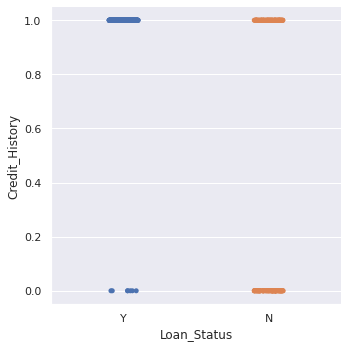

In [ ]:
sb.catplot(x = 'Loan_Status', y = 'Credit_History', data = loan_train)

In [ ]:
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(value = 1.0)

Property_Area

In [ ]:
loan_train['Property_Area'].describe()

count           606
unique            3
top       Semiurban
freq            229
Name: Property_Area, dtype: object

In [ ]:
loan_train['Property_Area'].isnull().sum()

0

In [ ]:
loan_train['Property_Area'].value_counts()

Semiurban    229
Urban        200
Rural        177
Name: Property_Area, dtype: int64

In [ ]:
Property_Area_Dummies = pd.get_dummies(loan_train['Property_Area'])
Property_Area_Dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
601,1,0,0
602,1,0,0
603,0,0,1
604,0,0,1


In [ ]:
loan_train['Property_Area_Rural'] = Property_Area_Dummies['Rural']
loan_train['Property_Area_Semiurban'] = Property_Area_Dummies['Semiurban']

In [ ]:
loan_train.drop('Property_Area', axis = 1, inplace = True)

In [ ]:
loan_train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
dtype: int64

#### Finally we replaced all the null values with suitable values.

In [ ]:
loan_train.dtypes

Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
dtype: object

Feature Selection

In [ ]:
print(" Columns in the Train Data : \n", loan_train.columns)

 Columns in the Train Data : 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')


In [ ]:
loan_train.drop('Loan_ID', axis = 1, inplace = True)

Detecting Outliers

In [ ]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

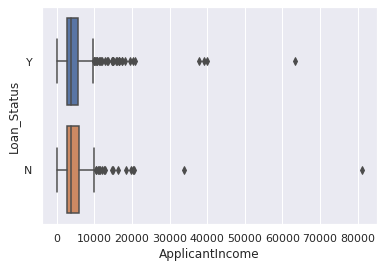

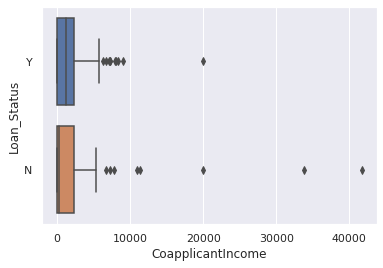

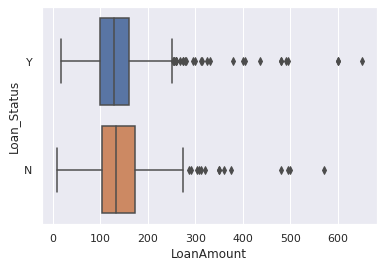

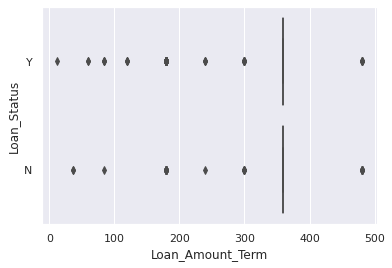

In [ ]:
numerical_continuous_data_column = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for column in numerical_continuous_data_column:
    sb.boxplot(x = column, y = 'Loan_Status', data = loan_train)
    plt.show()

In [ ]:
loan_train[loan_train['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
154,1,1,3,1,0,39999,0.0,600.0,180.0,0.0,Y,0,1
181,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,N,0,1
183,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,Y,0,1
330,1,1,0,1,0,63337,0.0,490.0,180.0,1.0,Y,0,0
405,1,1,3,1,0,81000,0.0,360.0,360.0,0.0,N,1,0
439,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,Y,0,1


In [ ]:
loan_train[loan_train['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
395,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,Y,0,1
410,1,1,2,1,1,1600,20000.0,239.0,360.0,1.0,N,0,0
571,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,N,0,0
588,0,0,3,1,0,416,41667.0,350.0,180.0,1.0,N,0,0


#### Drop the samples having yes value on Loan_Status on  the above samples listed

In [ ]:
loan_train[loan_train['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban
129,1,0,0,1,1,20166,0.0,650.0,480.0,1.0,Y,0,0
174,1,1,3,1,0,5516,11300.0,495.0,360.0,0.0,N,0,1
273,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,Y,0,1
303,1,0,0,1,0,20233,0.0,480.0,360.0,1.0,N,1,0
362,1,1,0,1,0,19730,5266.0,570.0,360.0,1.0,N,1,0
425,1,0,0,1,0,12876,0.0,405.0,360.0,1.0,Y,0,1
477,1,1,1,1,0,18333,0.0,500.0,360.0,1.0,N,0,0
496,1,1,0,1,0,20833,6667.0,480.0,360.0,1.0,Y,0,0
513,1,1,2,1,1,7948,7166.0,480.0,360.0,1.0,Y,1,0
551,0,1,1,1,1,19484,0.0,600.0,360.0,1.0,Y,0,1


Feature Observation

In [ ]:
loan_train = loan_train.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 10]]

In [ ]:
loan_train_corr = loan_train.corr()
loan_train_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
Gender,1.000000,0.366590,0.177947,-0.050592,-0.008620,0.037618,0.084443,0.101011,-0.070614,0.007587,0.083670,-0.114190
Married,0.366590,1.000000,0.358711,-0.014614,-0.001456,0.034116,0.072649,0.140636,-0.093224,0.012848,-0.009607,0.013224
Dependents,0.177947,0.358711,1.000000,-0.068021,0.064654,0.099335,0.040718,0.118545,-0.093708,-0.040816,-0.005443,0.005385
Education,-0.050592,-0.014614,-0.068021,1.000000,0.001668,0.140469,0.063823,0.164329,0.080791,0.072475,-0.075389,0.035507
Self_Employed,-0.008620,-0.001456,0.064654,0.001668,1.000000,0.166815,-0.030693,0.131557,-0.031999,-0.010477,0.025768,0.000955
ApplicantIncome,0.037618,0.034116,0.099335,0.140469,0.166815,1.000000,-0.123126,0.511592,0.027774,-0.024167,0.063593,-0.036304
CoapplicantIncome,0.084443,0.072649,0.040718,0.063823,-0.030693,-0.123126,1.000000,0.225557,-0.065836,0.009482,0.001573,-0.026096
LoanAmount,0.101011,0.140636,0.118545,0.164329,0.131557,0.511592,0.225557,1.000000,0.092639,0.011810,0.059276,-0.003230
Loan_Amount_Term,-0.070614,-0.093224,-0.093708,0.080791,-0.031999,0.027774,-0.065836,0.092639,1.000000,-0.012578,0.026631,0.056081
Credit_History,0.007587,0.012848,-0.040816,0.072475,-0.010477,-0.024167,0.009482,0.011810,-0.012578,1.000000,-0.021944,0.039195


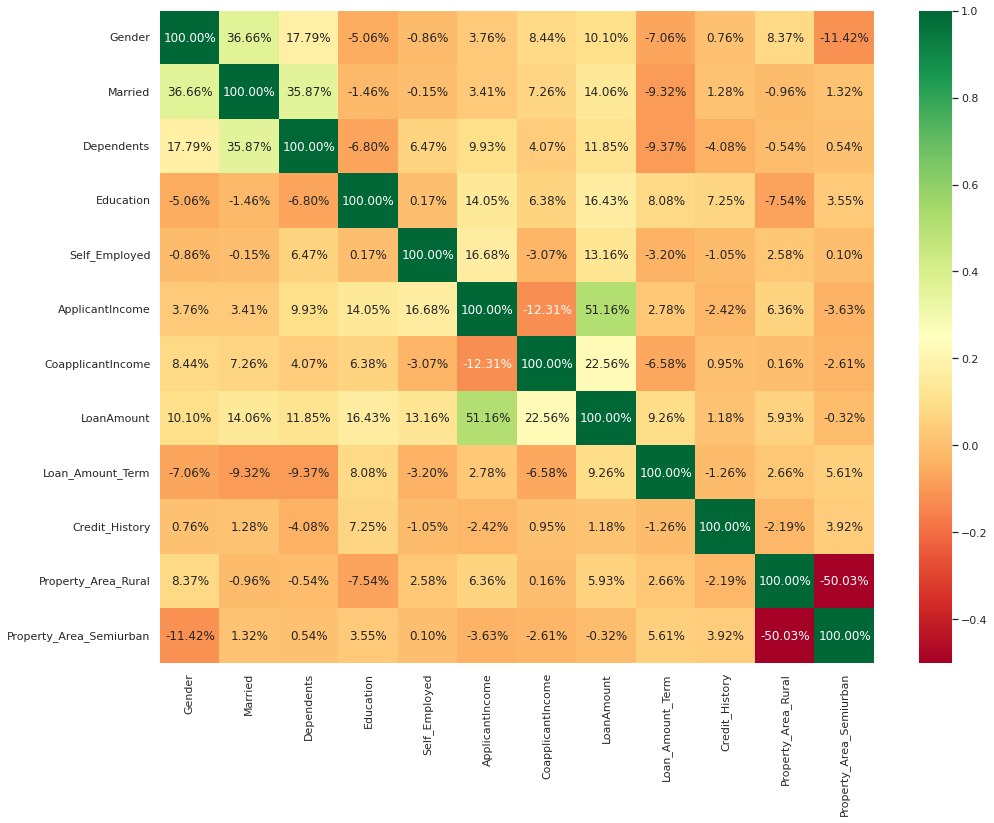

In [ ]:
plt.figure(figsize = (16, 12))
sb.heatmap(loan_train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('/correlation_of_features.png')

In [ ]:
loan_train['Loan_Status'].value_counts()

Y    410
N    192
Name: Loan_Status, dtype: int64

In [ ]:
corr_with_loan_status = loan_train.corrwith(loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]))
corr_with_loan_status

Gender                     0.011715
Married                    0.089913
Dependents                 0.002857
Education                  0.079361
Self_Employed             -0.015387
ApplicantIncome           -0.062717
CoapplicantIncome         -0.058394
LoanAmount                -0.063170
Loan_Amount_Term          -0.016119
Credit_History             0.544114
Property_Area_Rural       -0.098164
Property_Area_Semiurban    0.133075
dtype: float64

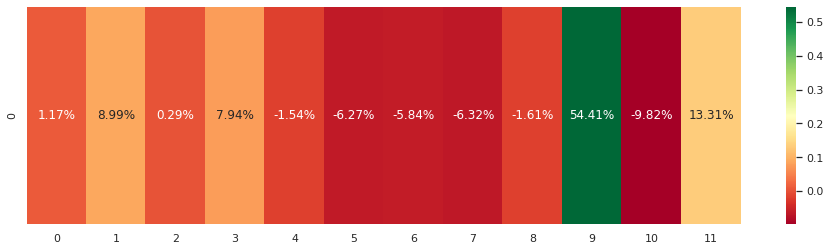

In [ ]:
plt.figure(figsize = (16, 4))
sb.heatmap([corr_with_loan_status], cmap = 'RdYlGn', annot = True, fmt = '.2%')
plt.savefig('/correlation_of_features_with_loan_status.png')

<Figure size 864x432 with 0 Axes>

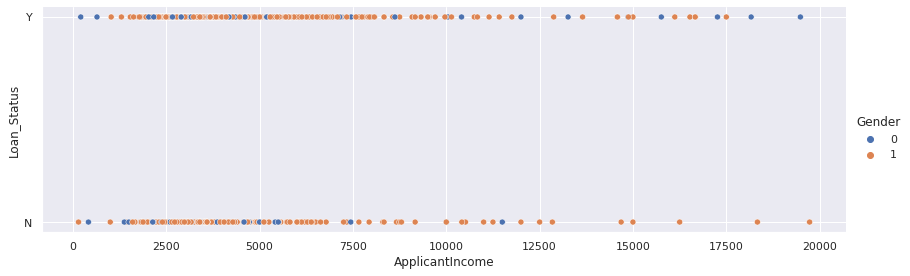

In [ ]:
plt.figure(figsize = (12, 6))
sb.relplot(x = 'ApplicantIncome', y = 'Loan_Status', 
           data = loan_train[loan_train['ApplicantIncome'] <= 20000],
           hue = 'Gender', aspect = 3, height = 4)

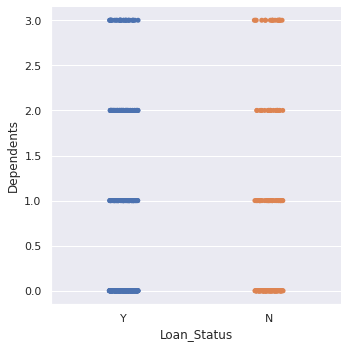

In [ ]:
sb.catplot(x = 'Loan_Status', y = 'Dependents', data = loan_train)

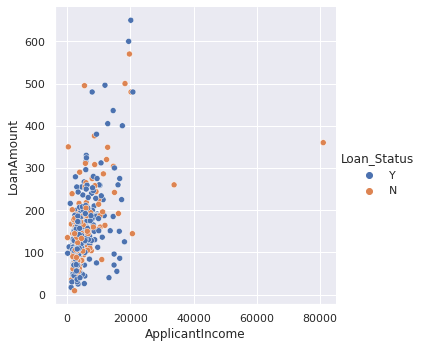

In [ ]:

sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

There is a relation between LoanAmount and Applicant Income but not classifying Loan_Status

In [ ]:
y = loan_train['Loan_Status'].apply(lambda x : {'Y' : 1, 'N' : 0}[x]).values
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(loan_train.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Gender                      2.136072
Married                     2.192634
Dependents                  6.313574
Education                   2.648974
Self_Employed               2.170541
ApplicantIncome            18.479548
CoapplicantIncome          11.743562
LoanAmount                 18.124334
Loan_Amount_Term            4.749443
Credit_History             27.944816
Property_Area_Rural         1.648178
Property_Area_Semiurban     1.848324
dtype: float64

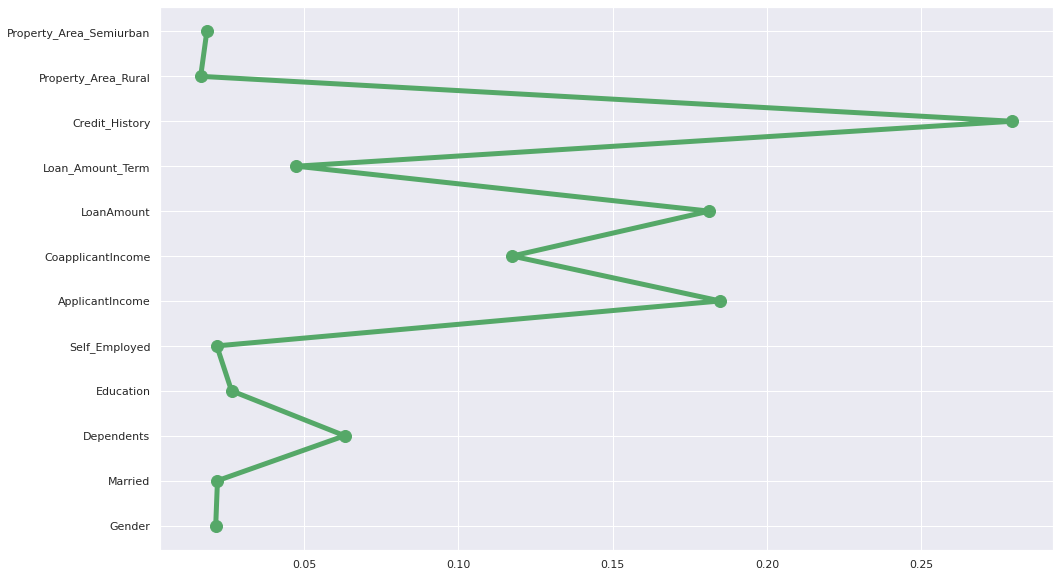

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, loan_train.columns[:-1], 'g-o', linewidth=5, markersize=12)
#plt.savefig("../images/feature_importances.png")

From the above plot, Credit_History (28 %) has the more importance, and then Loan Amount and Applicant Income and then Co-applicant Income

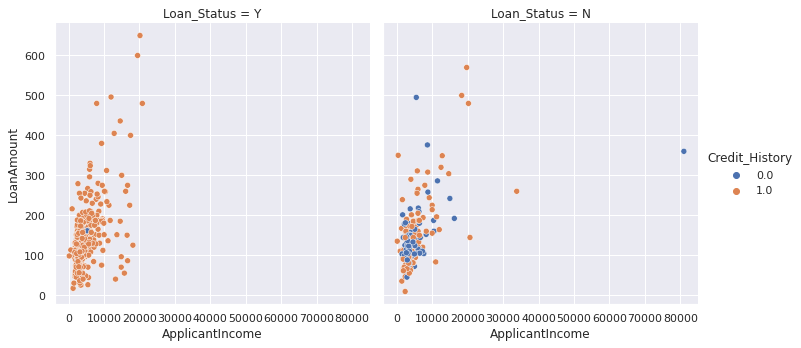

In [ ]:
sb.relplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

From the above plot,
The applicants those who are all having the credit history mostly getting te Loan Amount
From this, Credit_History is the major feature.

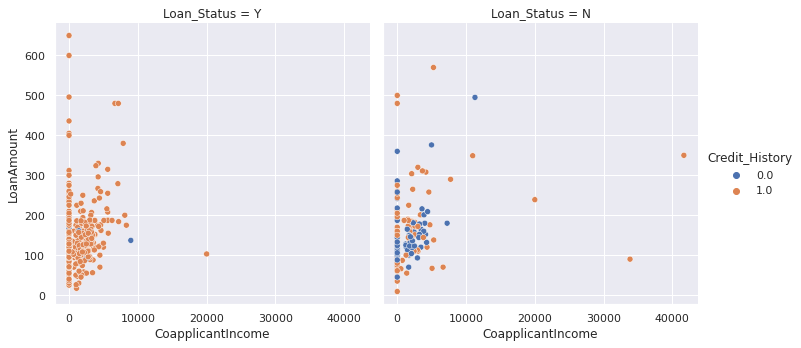

In [ ]:
sb.relplot(x = 'CoapplicantIncome', y = 'LoanAmount', data = loan_train,
           hue = 'Credit_History', col = 'Loan_Status')

Most of the Co-applicants are not having income

Feature Selection

In [ ]:
prediction_features = pd.Series(etc.feature_importances_*100, index = loan_train.columns[:-1]).sort_values(ascending = False)

In [ ]:
prediction_features = prediction_features.index

In [ ]:
prediction_features = prediction_features[:5]
prediction_features

Index(['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome',
       'Dependents'],
      dtype='object')

Model Building

In [ ]:
feature_columns = loan_train[prediction_features]
prediction_column = loan_train['Loan_Status']

In [ ]:
X = feature_columns.values
y = prediction_column.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((481, 5), (121, 5), (481,), (121,))

Logistic Regresion with Model Performance
<br>
Simple Logistic Regression

In [ ]:
logictic_model = LogisticRegression(max_iter = 1000)
logictic_model.fit(X_train, y_train)

print("Training Accuracy : {}%".format(logictic_model.score(X_train, y_train) * 100))
print("Testing Accuracy  : {}%".format(logictic_model.score(X_test, y_test) * 100))

Training Accuracy : 80.04158004158003%
Testing Accuracy  : 84.29752066115702%


Logistic Regression model is having 80% Training Accuracy and 86% Testing Accuracy

In [ ]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)


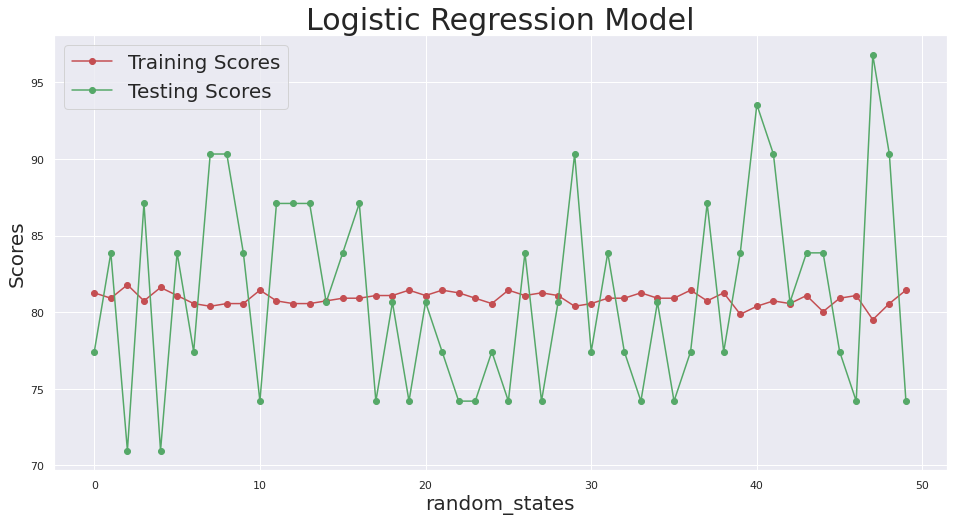

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [ ]:
train_scores = []
test_scores = []
logistic_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)
    
    logictic_model = LogisticRegression(max_iter = 200)
    logictic_model.fit(X_train, y_train)
    
    train_score = logictic_model.score(X_train, y_train) * 100
    test_score = logictic_model.score(X_test, y_test) * 100
    
    logistic_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

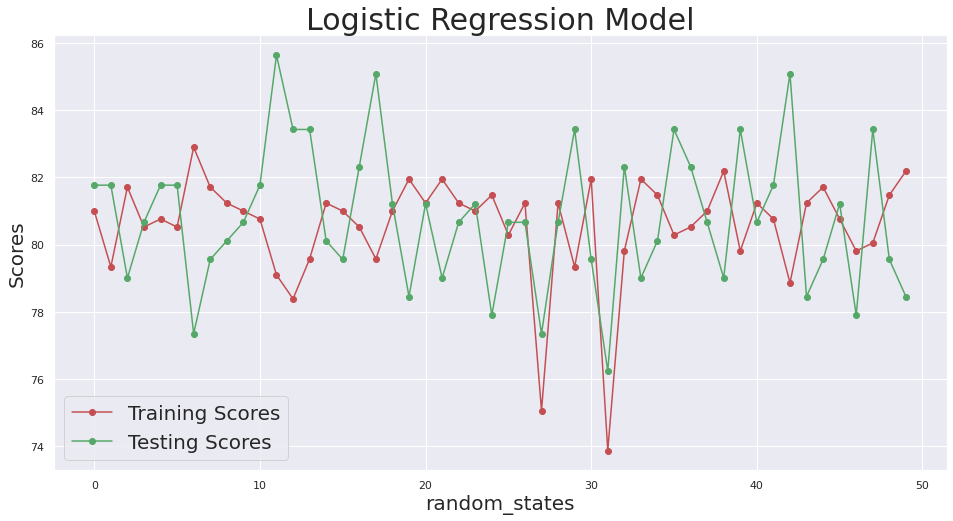

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Logistic Regression Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/logistic_model_performance.png')
plt.show()

In [ ]:
for scores in zip(train_scores, test_scores, abs(np.array(train_scores) - np.array(test_scores))):
    print(scores)

(80.9976247030879, 81.76795580110497, 0.7703310980170812)
(79.33491686460808, 81.76795580110497, 2.4330389364968994)
(81.71021377672209, 79.00552486187846, 2.7046889148436293)
(80.52256532066508, 80.66298342541437, 0.14041810474928695)
(80.76009501187649, 81.76795580110497, 1.0078607892284879)
(80.52256532066508, 81.76795580110497, 1.2453904804398945)
(82.89786223277909, 77.34806629834254, 5.5497959344365455)
(81.71021377672209, 79.55801104972376, 2.1522027269983255)
(81.23515439429929, 80.11049723756905, 1.1246571567302368)
(80.9976247030879, 80.66298342541437, 0.33464127767352636)
(80.76009501187649, 81.76795580110497, 1.0078607892284879)
(79.09738717339667, 85.6353591160221, 6.537971942625433)
(78.38479809976246, 83.42541436464089, 5.040616264878423)
(79.57244655581948, 83.42541436464089, 3.852967808821404)
(81.23515439429929, 80.11049723756905, 1.1246571567302368)
(80.9976247030879, 79.55801104972376, 1.439613653364134)
(80.52256532066508, 82.32044198895028, 1.7978766682851983)
(79

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

Decision Tree Classifier with Model Performance
<br>Simple Decision Tree Classifier


Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

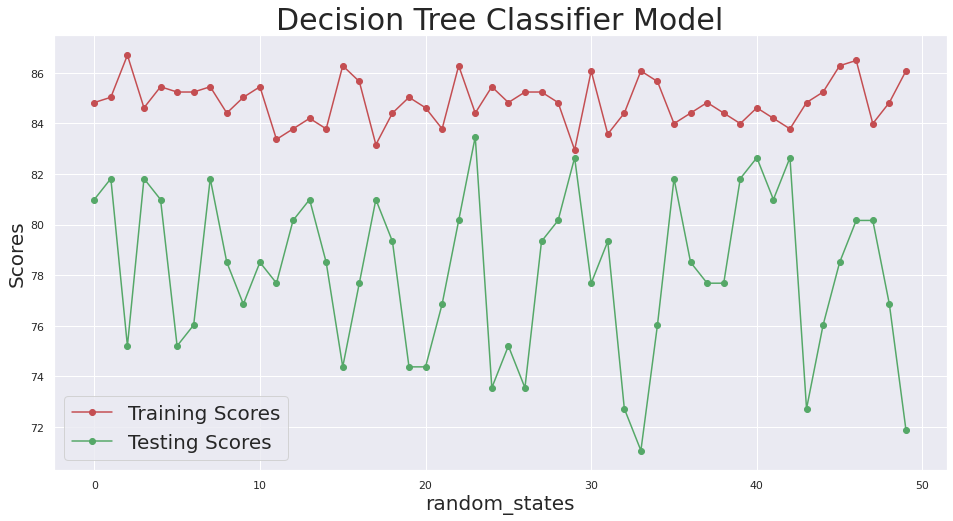

In [ ]:
train_scores = []
test_scores = []
decision_tree_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)
    
    decision_tree_model = DecisionTreeClassifier(max_depth = 6)
    decision_tree_model.fit(X_train, y_train)
    
    train_score = decision_tree_model.score(X_train, y_train) * 100
    test_score = decision_tree_model.score(X_test, y_test) * 100
    
    decision_tree_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('Decision Tree Classifier Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
#plt.savefig('../images/decision_tree_model_performance.png')
plt.show()

#### For Decision Tree Classifier model, we are going to choose max_depth as 8 from the above plot.

In [ ]:
for scores in zip(training_scores, testing_scores):
    print(scores)

(82.32848232848234, 74.3801652892562)
(83.16008316008316, 73.55371900826447)
(83.78378378378379, 72.72727272727273)
(84.61538461538461, 72.72727272727273)
(85.23908523908524, 72.72727272727273)
(86.07068607068608, 71.900826446281)
(87.11018711018711, 72.72727272727273)
(88.14968814968816, 71.900826446281)
(89.3970893970894, 71.900826446281)
(90.64449064449065, 71.900826446281)
(92.51559251559252, 69.42148760330579)
(95.21829521829522, 65.28925619834712)
(96.25779625779626, 66.11570247933885)
(97.2972972972973, 69.42148760330579)
(98.33679833679834, 66.11570247933885)
(98.96049896049897, 69.42148760330579)
(100.0, 65.28925619834712)
(100.0, 65.28925619834712)
(100.0, 66.94214876033058)
(100.0, 66.94214876033058)
(100.0, 67.76859504132231)
(100.0, 66.11570247933885)
(100.0, 66.11570247933885)
(100.0, 67.76859504132231)
(100.0, 65.28925619834712)
(100.0, 66.11570247933885)
(100.0, 64.46280991735537)
(100.0, 66.94214876033058)
(100.0, 66.94214876033058)


max_depth = 8, we get a Training Accuracy of 85.74% and a Testing Accuracy of 85.36%

A Final overview of different kind of Model Based on their performance

Simple Logistic Regression Model without Standard Scaling and without PCA :
- Training Samples with random_state = 3
- Training Accuracy : 80.04073319755601%
- Testing Accuracy  : 86.1788617886179%


Decision Tree Classifier Model without Standard Scaling:
- random_state = 3
- Max-Depth = 8
- Training Accuracy : 85.53 %
- Testing Accuracy  : 85.36 %


Test Data Predictions

In [ ]:
loan_test = pd.read_csv('/content/drive/MyDrive/dataset/final project/test.csv')
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
loan_test = loan_test.loc[:, prediction_features]
loan_test.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents
0,1.0,5720,110.0,0,0
1,1.0,3076,126.0,1500,1
2,1.0,5000,208.0,1800,2
3,NaN,2340,100.0,2546,2
4,1.0,3276,78.0,0,0


In [284]:
# Preprocessing Test Data
loan_test.isnull().sum()

Credit_History       29
ApplicantIncome       0
LoanAmount            5
CoapplicantIncome     0
Dependents           10
dtype: int64

The major feature for our model prediction is credit_history
<br>so we are going to remove the samples having null values on Credit_History

In [ ]:
loan_test = loan_test.dropna(how = 'any')

In [ ]:
loan_test.isnull().sum()

Credit_History       0
ApplicantIncome      0
LoanAmount           0
CoapplicantIncome    0
Dependents           0
dtype: int64

In [ ]:
# TODO : Encoding Categorical data into NUmerical Data
loan_test['Dependents'] = loan_test['Dependents'].apply(lambda x : {'0' : 0, '1' : 1, '2' : 2, '3+' : 3}[x])

KeyError: ignored

In [ ]:
loan_test['Loan_Status_Predicted'] = decision_tree_model.predict(loan_test.values)

In [ ]:
loan_test.head(25)

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Dependents,Loan_Status_Predicted
0,1.0,5720,110.0,0,0,Y
1,1.0,3076,126.0,1500,1,Y
2,1.0,5000,208.0,1800,2,Y
4,1.0,3276,78.0,0,0,Y
5,1.0,2165,152.0,3422,0,Y
6,1.0,2226,59.0,0,1,Y
7,0.0,3881,147.0,0,2,N
8,1.0,13633,280.0,0,2,Y
9,1.0,2400,123.0,2400,0,Y
10,1.0,3091,90.0,0,0,Y


In [ ]:
loan_test.Loan_Status_Predicted.value_counts()

Y    265
N     61
Name: Loan_Status_Predicted, dtype: int64